## LBP CASCADE

In [ ]:
from google.colab.patches import cv2_imshow

Face Found 3


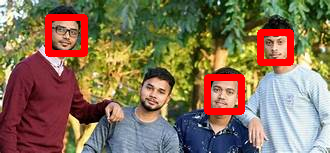

In [ ]:
import cv2
image=cv2.imread("/content/testt.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
haar_face_cascade=cv2.CascadeClassifier("lbpcascade_frontalface.xml")
faces=haar_face_cascade.detectMultiScale(gray, scaleFactor=1.1,minNeighbors=5)

for x,y,w,h in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5)

print("Face Found",len(faces))
cv2_imshow(image)

## HAAR CASCADE

Face Found 4


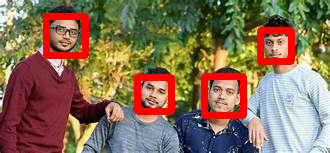

In [ ]:
import cv2
image=cv2.imread("/content/testt.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
haar_face_cascade=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces=haar_face_cascade.detectMultiScale(gray, scaleFactor=1.1,minNeighbors=5)

for x,y,w,h in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5)

print("Face Found",len(faces))
cv2_imshow(image)

## DLIB USING HOG DETECTOR

In [ ]:
# Get the HoG face detection model.
import dlib
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [ ]:
import os
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

In [ ]:
def hogDetectFaces(image, hog_face_detector, display = True):
    
    
    # Get the height and width of the input image.
    height, width, _ = image.shape
    
    # Create a copy of the input image to draw bounding boxes on.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the current time before performing face detection.
    start = time()

    # Perform the face detection on the image.
    results = hog_face_detector(imgRGB, 0)
    
    # Get the current time after performing face detection.
    end = time()

    # Loop through the bounding boxes of each face detected in the image.
    for bbox in results:
        
        # Retrieve the left most x-coordinate of the bounding box.
        x1 = bbox.left()
        
        # Retrieve the top most y-coordinate of the bounding box.
        y1 = bbox.top()
        
        # Retrieve the right most x-coordinate of the bounding box.
        x2 = bbox.right()
        
        # Retrieve the bottom most y-coordinate of the bounding box.       
        y2 = bbox.bottom()

        # Draw a rectangle around a face on the copy of the image using the retrieved coordinates.
        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)
    
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Write the time take by face detection process on the output image. 
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        return output_image, results              

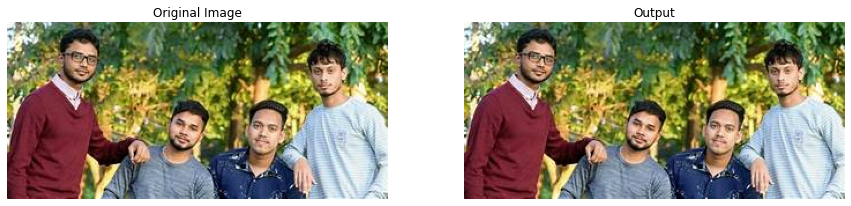

In [ ]:
import cv2
image = cv2.imread('testt.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

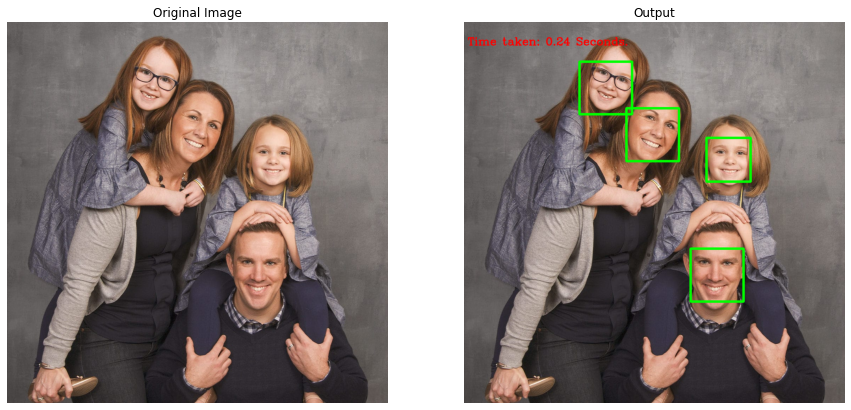

In [ ]:
import cv2
image = cv2.imread('/content/WhatsApp Image 2022-04-22 at 12.05.11 PM (2).jpeg')
hogDetectFaces(image, hog_face_detector, display=True)

## DNN

In [ ]:
opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="/content/deploy.prototxt",
                                            caffeModel="/content/res10_300x300_ssd_iter_140000_fp16.caffemodel")
opencv_dnn_model

<dnn_Net 0x7efeb11f0430>

In [ ]:
def cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.5, display = True):
  
    
    # Get the height and width of the input image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image to draw bounding boxes and write confidence scores.
    output_image = image.copy()
    
    # Perform the required pre-processings on the image and create a 4D blob from image.
    # Resize the image and apply mean subtraction to its channels
    # Also convert from BGR to RGB format by swapping Blue and Red channels.
    preprocessed_image = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300),
                                               mean=(104.0, 117.0, 123.0), swapRB=False, crop=False)

    # Set the input value for the model.
    opencv_dnn_model.setInput(preprocessed_image)

    # Get the current time before performing face detection.
    start = time()

    # Perform the face detection on the image.
    results = opencv_dnn_model.forward()    

    # Get the current time after performing face detection.
    end = time()
        
    # Loop through each face detected in the image.
    for face in results[0][0]:
        
        # Retrieve the face detection confidence score.
        face_confidence = face[2]
        
        # Check if the face detection confidence score is greater than the thresold.
        if face_confidence > min_confidence:
            
            # Retrieve the bounding box of the face.
            bbox = face[3:]
            
            # Retrieve the bounding box coordinates of the face and scale them according to the original size of the image.
            x1 = int(bbox[0] * image_width)
            y1 = int(bbox[1] * image_height)
            x2 = int(bbox[2] * image_width)
            y2 = int(bbox[3] * image_height)

            # Draw a bounding box around a face on the copy of the image using the retrieved coordinates.
            cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=image_width//200)
            
            # Draw a filled rectangle near the bounding box of the face.
            # We are doing it to change the background of the confidence score to make it easily visible.
            cv2.rectangle(output_image, pt1=(x1, y1-image_width//20), pt2=(x1+image_width//16, y1),
                          color=(0, 255, 0), thickness=-1)

            # Write the confidence score of the face near the bounding box and on the filled rectangle. 
            cv2.putText(output_image, text=str(round(face_confidence, 1)), org=(x1, y1-25), 
                        fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                        color=(255,255,255), thickness=image_width//200)
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Write the time take by face detection process on the output image. 
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                    color=(0,0,255), thickness=image_width//500)
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        return output_image, results              

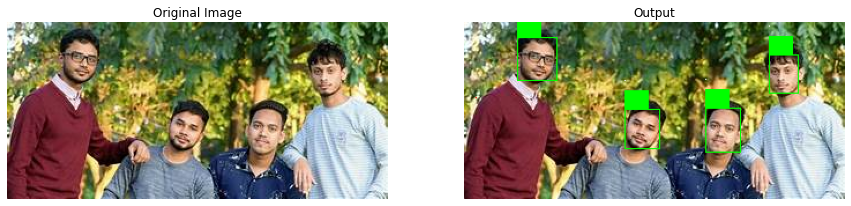

In [ ]:

image = cv2.imread('testt.jpg')
cvDnnDetectFaces(image, opencv_dnn_model, display=True)